# Descriptive statistics

In this notebook we'll see how to calculate numerical and graphical summaries of different types of data. Open the [chapter preview](https://minireference.com/static/excerpts/noBSstats/descriptive_statistics.pdf) in another tab, and follow along with the hands on calculations based on `pandas` and `seaborn`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",  # ALT sns.color_palette('Blues', 4)
    rc={
        'figure.figsize': (7,4),
        'font.serif': ['Palatino'],
        'font.family': 'serif'
       }
)
pd.set_option("display.precision", 2)


%config InlineBackend.figure_format = 'retina'

In [2]:
#@title Load CSV data
import io
data_file = io.StringIO("""
student_ID,background,curriculum,effort,score
1,arts,debate,10.96,75
2,science,lecture,8.69,75
3,arts,debate,8.6,67
4,arts,lecture,7.92,70.3
5,science,debate,9.9,76.1
6,business,debate,10.8,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57
10,science,lecture,7.71,69
11,business,debate,9.82,70.4
12,arts,debate,11.53,96.2
13,science,debate,7.1,62.9
14,science,lecture,6.39,57.6
15,arts,debate,12,84.3
""")

In [3]:
students = pd.read_csv(data_file, index_col="student_ID")
students

,background,curriculum,effort,score
student_ID,,,,
1,arts,debate,10.96,75.0
2,science,lecture,8.69,75.0
3,arts,debate,8.60,67.0
4,arts,lecture,7.92,70.3
5,science,debate,9.90,76.1
6,business,debate,10.80,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57.0


In [4]:
students.groupby('curriculum')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
curriculum,,,,,,,,
debate,8.0,76.46,10.52,62.9,69.55,75.55,80.92,96.2
lecture,7.0,68.14,7.76,57.0,63.30,70.30,73.85,75.4


In [5]:
# rows
students.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='student_ID')

In [6]:
# columns
students.columns

Index(['background', 'curriculum', 'effort', 'score'], dtype='object')

# Describing numeric data

Let'look at the scrore variable.

In [7]:
scores = students['score']
scores.describe()

count    15.00
mean     72.58
std       9.98
min      57.00
25%      68.00
50%      72.70
75%      75.75
max      96.20
Name: score, dtype: float64

In [8]:
str(list(scores))

'[75.0, 75.0, 67.0, 70.3, 76.1, 79.8, 72.7, 75.4, 57.0, 69.0, 70.4, 96.2, 62.9, 57.6, 84.3]'

In [9]:
students['score'].describe()

count    15.00
mean     72.58
std       9.98
min      57.00
25%      68.00
50%      72.70
75%      75.75
max      96.20
Name: score, dtype: float64

In [10]:
students[['score']].describe()

,score
count,15.00
mean,72.58
std,9.98
min,57.00
25%,68.00
50%,72.70
75%,75.75
max,96.20


In [11]:
scores.median()

72.7

In [12]:
# np.std(scores, ddof=1)

In [13]:
scores.max()

96.2

In [14]:
scores.mean()

72.58

In [15]:
scores.var()  # sample variance,  1/(n-1) EE(x-mean)^2

99.58600000000001

In [16]:
 scores.var(ddof=0)  # variance 1/n EE(x-mean)^2   (not bias corrected)

92.94693333333335

In [17]:
scores.std()

9.979278531036199

In [18]:
scores.value_counts(bins=[50,60,70,80,90,100]).sort_index()

(49.999, 60.0]    2
(60.0, 70.0]      3
(70.0, 80.0]      8
(80.0, 90.0]      1
(90.0, 100.0]     1
Name: score, dtype: int64

In [19]:
# note mode is the bin 70--80, which contains 8 values

In [20]:
# scores.hist()

In [21]:
# scores.hist(bins=[50,60,70,80,90,100])

<AxesSubplot:xlabel='score', ylabel='Count'>

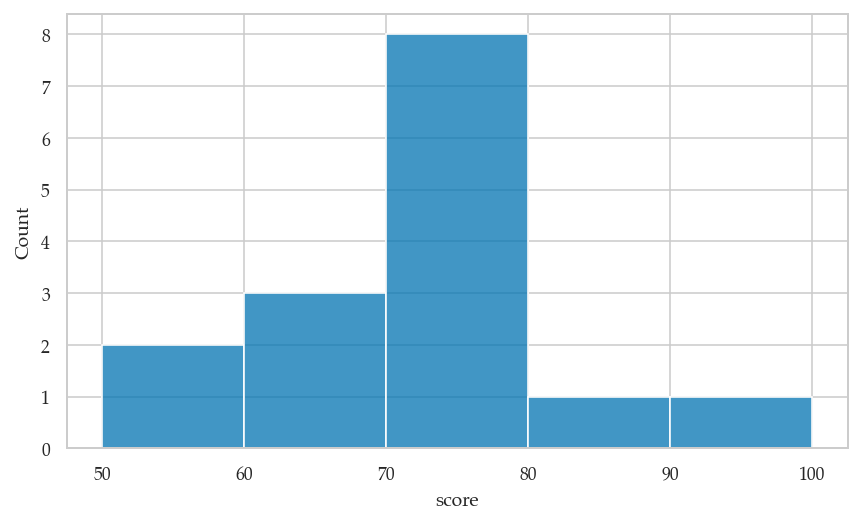

In [22]:
sns.histplot(x="score", data=students, bins=[50,60,70,80,90,100])

<AxesSubplot:xlabel='score', ylabel='Count'>

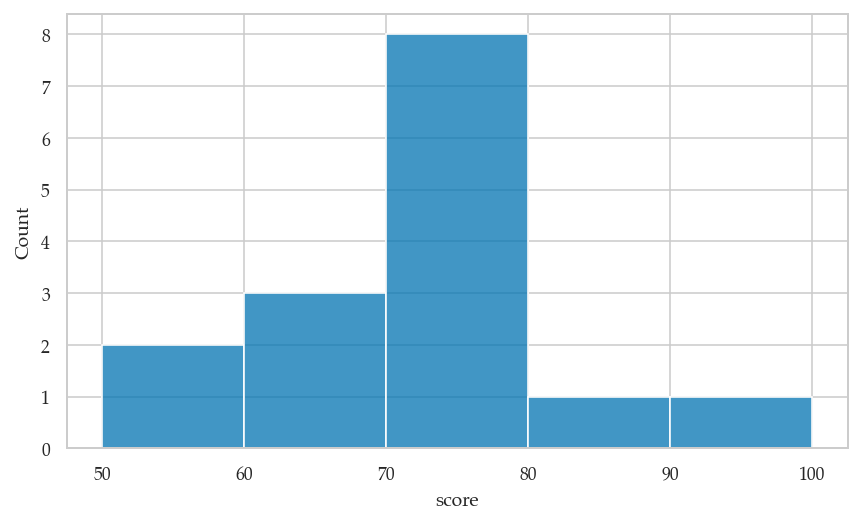

In [23]:
sns.histplot(x=scores, bins=[50,60,70,80,90,100])

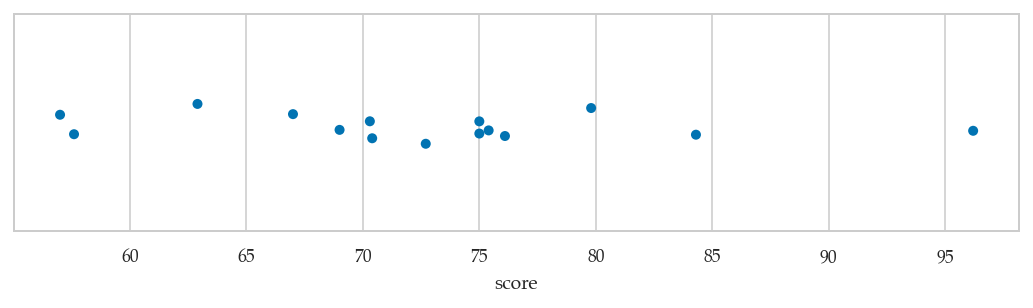

In [24]:
with plt.rc_context({'figure.figsize':(9,2)}):
    sns.stripplot(x=scores)

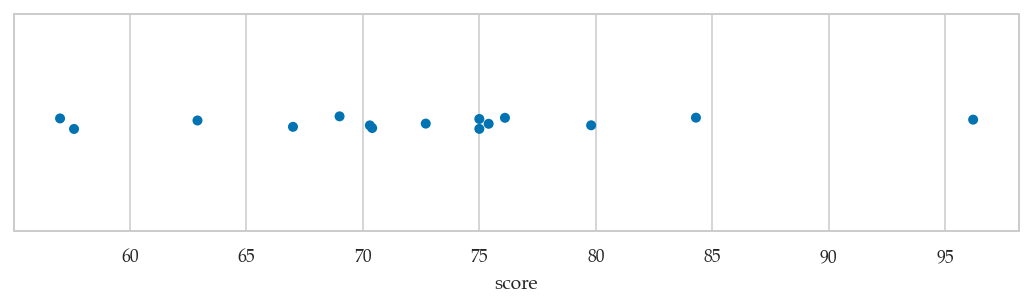

In [25]:
with plt.rc_context({'figure.figsize':(9,2)}):
    sns.stripplot(x="score", data=students, jitter=0.03)

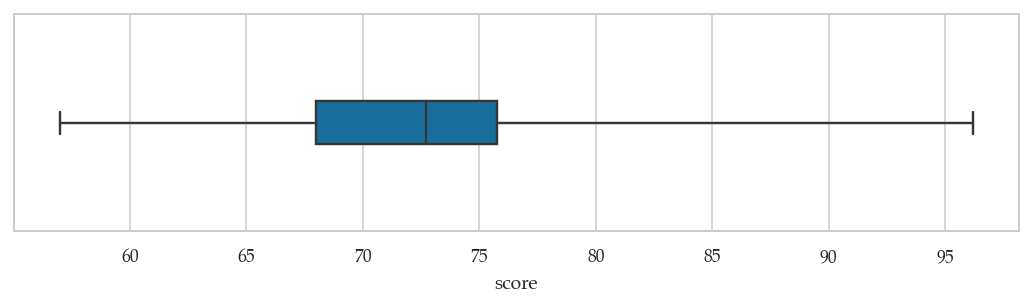

In [26]:
with plt.rc_context({'figure.figsize':(9,2)}):
    sns.boxplot(x="score", data=students, width=0.2, whis=10)

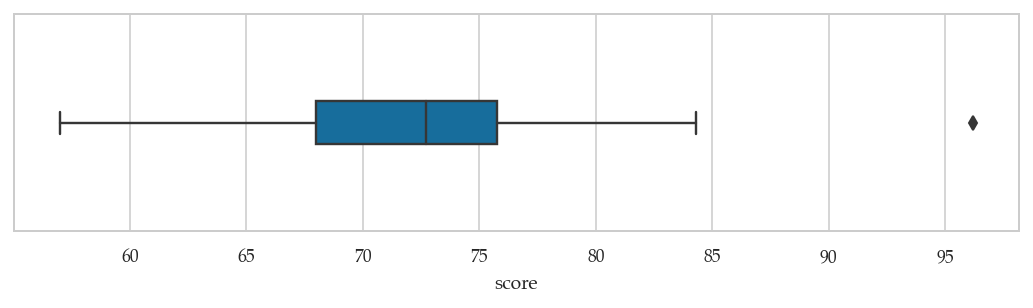

In [27]:
with plt.rc_context({'figure.figsize':(9,2)}):
    sns.boxplot(x=scores, width=0.2)

In [28]:
scores.quantile(0.25)  # Q1

68.0

In [29]:
scores.quantile(0.5)  # Q2 = median

72.7

In [30]:
scores.quantile(0.75)  # Q3

75.75

In [31]:
IQR = scores.quantile(0.75) - scores.quantile(0.25)
IQR

7.75

## Comparing two numeric variables


<AxesSubplot:xlabel='effort', ylabel='score'>

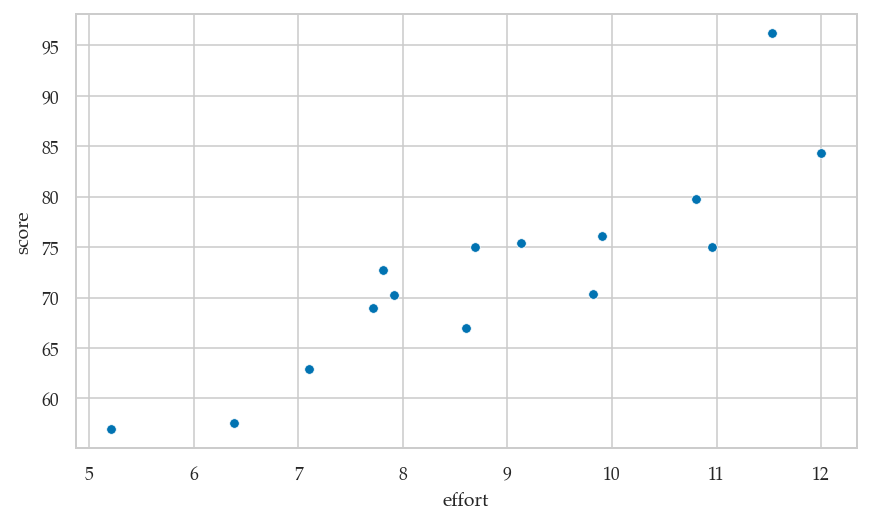

In [32]:
sns.scatterplot(x="effort", y="score", data=students)

In [33]:
students.cov()

,effort,score
effort,3.8,17.10
score,17.1,99.59


In [34]:
students.cov()['effort']['score']   # note: this uses 1/n-1

17.097314285714287

In [35]:
students.corr()['effort']['score']  # note: this uses 1/n-1

0.8794375135614694

## Multiple numerical variables

<AxesSubplot:xlabel='score', ylabel='curriculum'>

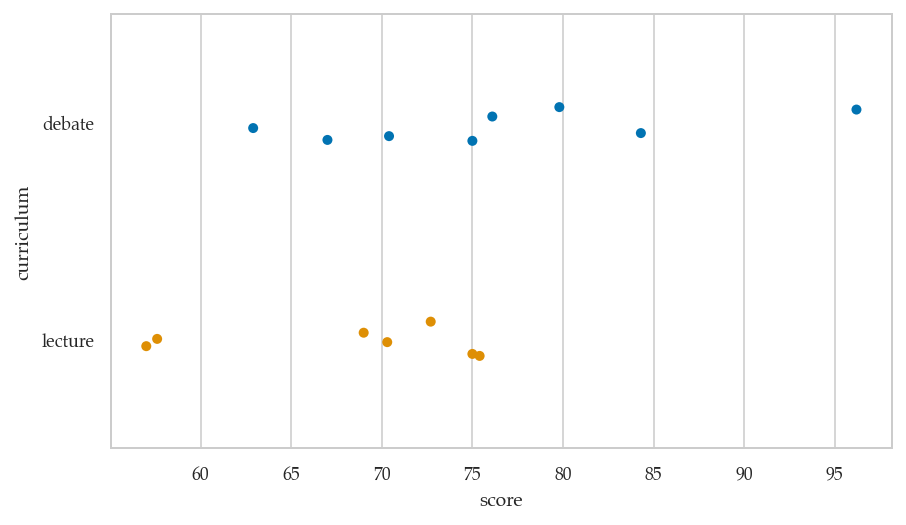

In [36]:
sns.stripplot(x="score", y="curriculum", data=students, jitter=True)

<AxesSubplot:xlabel='score', ylabel='curriculum'>

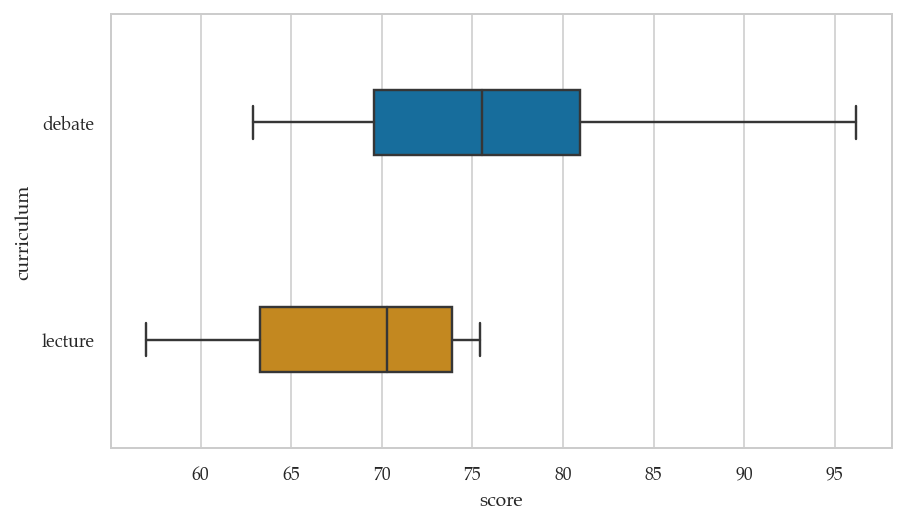

In [37]:
sns.boxplot(x="score", y="curriculum", width=0.3, data=students)

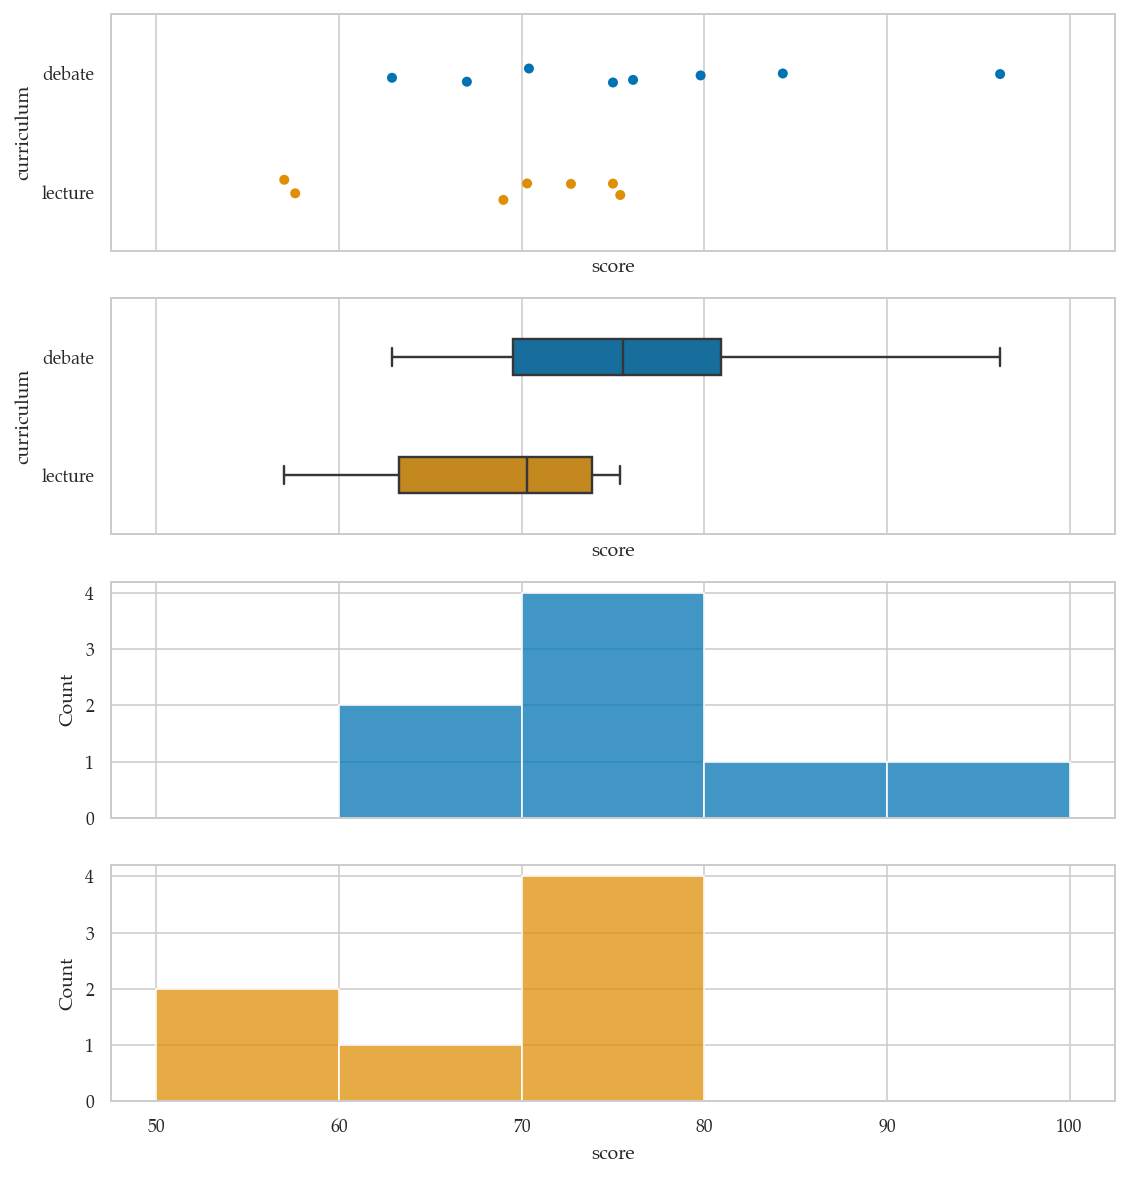

In [38]:
with plt.rc_context({'figure.figsize':(9,10)}):

    # combined plots
    fig, axes = plt.subplots(4, 1, sharex=True)

    sns.stripplot(x="score", y="curriculum", data=students, ax=axes[0])

    sns.boxplot(x="score", y="curriculum", data=students, width=0.3, ax=axes[1])

    blue, orange  = sns.color_palette()[0], sns.color_palette()[1]
    bins = [50, 60, 70, 80, 90, 100]
    debatescores = students[students["curriculum"]=="debate"]
    lecturescores = students[students["curriculum"]=="lecture"]
    sns.histplot(x="score", data=debatescores, color=blue, ax=axes[2], bins=bins,)
    sns.histplot(x="score", data=lecturescores, color=orange, ax=axes[3], bins=bins)

In [39]:
fig.savefig('/Users/ivan//Desktop/test-300dpi.pdf', dpi=300)

In [40]:
fig.savefig('/Users/ivan//Desktop/test-300dpi.pgf')

In [41]:
#sns.set_style(rc={'figure.figsize':(9,6)})

<AxesSubplot:xlabel='curriculum', ylabel='score'>

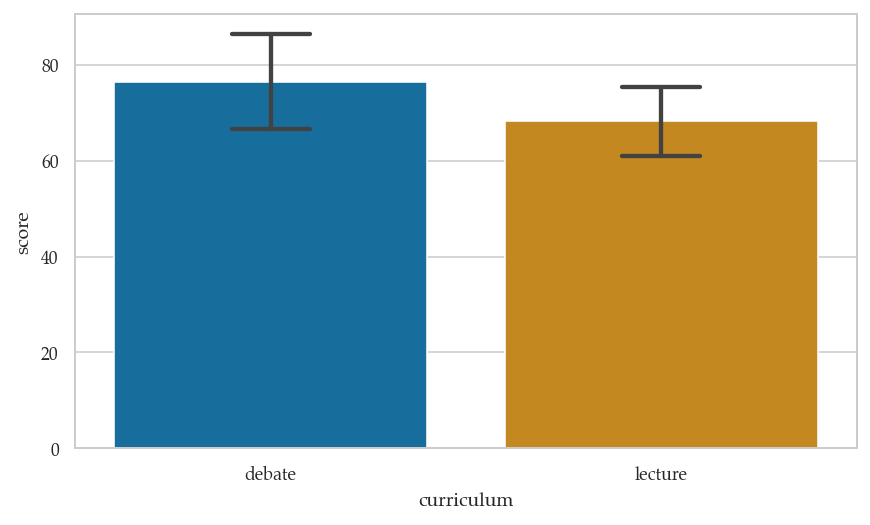

In [42]:
sns.barplot(x="curriculum", y="score",  ci="sd", data=students, capsize=.2)

# Categorical data

In [43]:
bg = students['background']
bg

student_ID
1         arts
2      science
3         arts
4         arts
5      science
6     business
7      science
8     business
9     business
10     science
11    business
12        arts
13     science
14     science
15        arts
Name: background, dtype: object

In [44]:
# frequencies
bg.value_counts()

science     6
arts        5
business    4
Name: background, dtype: int64

In [45]:
# relative frequencies
bg.value_counts() / len(bg)

science     0.40
arts        0.33
business    0.27
Name: background, dtype: float64

<AxesSubplot:xlabel='background', ylabel='count'>

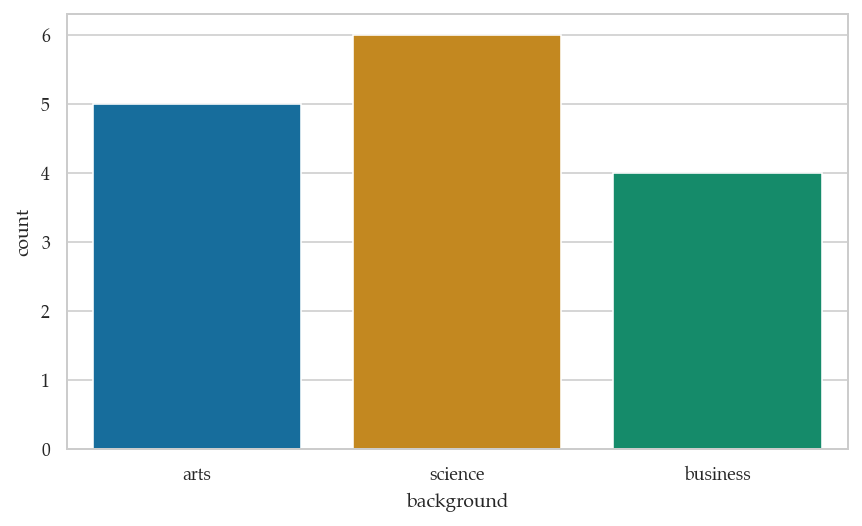

In [46]:
# bar chart of counts
sns.countplot(x=bg)

In [47]:
#sns.barplot?

## Comparing two categorical variables

<AxesSubplot:xlabel='background', ylabel='Count'>

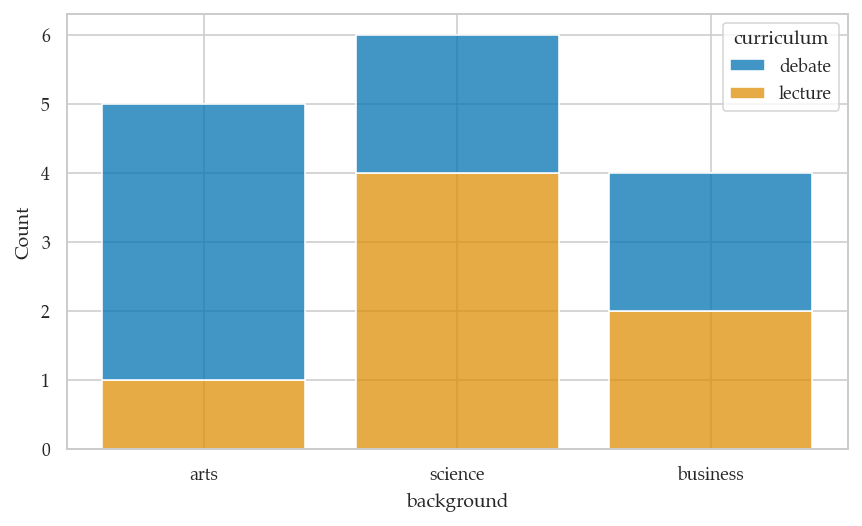

In [60]:
sns.histplot(data=students, x="background", hue="curriculum", shrink=.8, multiple='stack')

In [49]:
# ALT.
# sns.displot(data=students, x='background', hue='curriculum', multiple='stack', shrink=0.8)

<AxesSubplot:xlabel='background', ylabel='count'>

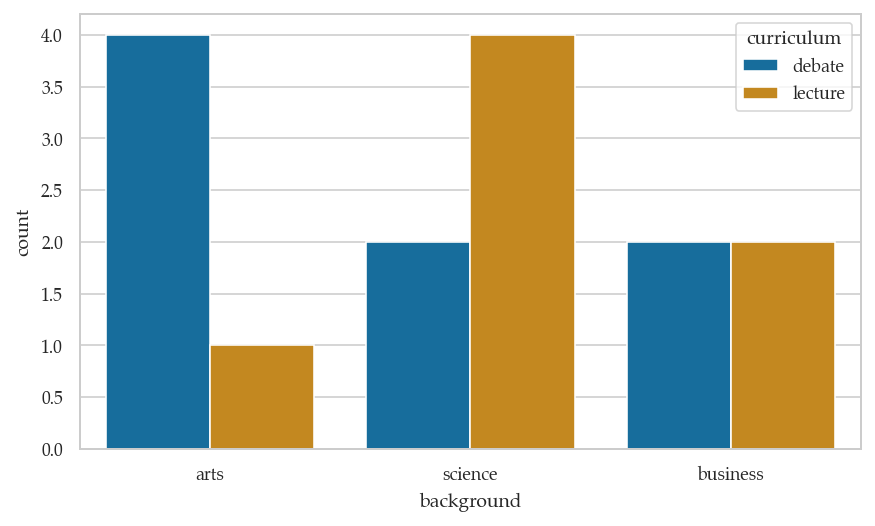

In [50]:
sns.countplot(x='background', hue='curriculum', data=students)

In [51]:
pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    margins=True,
    margins_name="Total",
)

background,arts,business,science,Total
curriculum,,,,
debate,4,2,2,8
lecture,1,2,4,7
Total,5,4,6,15


<AxesSubplot:xlabel='background'>

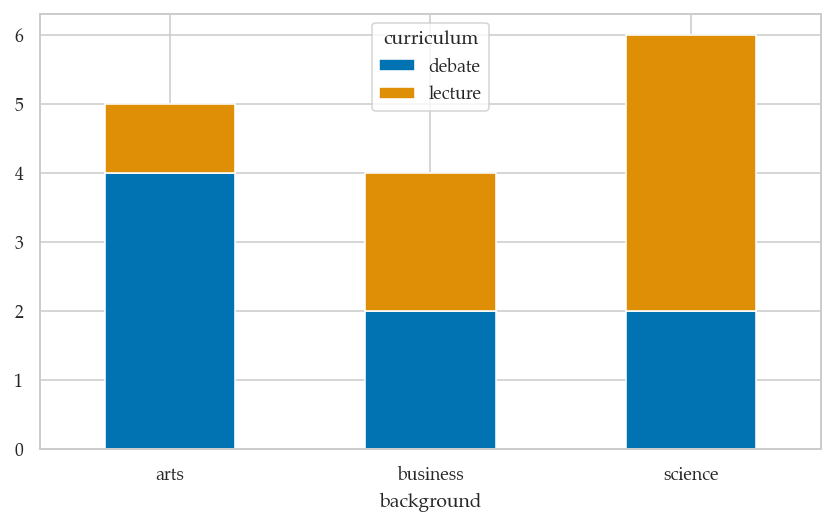

In [52]:
pd.crosstab(
    index=students['background'],
    columns=students['curriculum'],
).plot(kind='bar', stacked=True, rot=0)

In [53]:
pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    margins=True,
    normalize=True,
    margins_name="Total",
)

background,arts,business,science,Total
curriculum,,,,
debate,0.27,0.13,0.13,0.53
lecture,0.07,0.13,0.27,0.47
Total,0.33,0.27,0.40,1.00


In [54]:
pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    margins=True,
    normalize='columns',
    margins_name="Total",
)


background,arts,business,science,Total
curriculum,,,,
debate,0.8,0.5,0.33,0.53
lecture,0.2,0.5,0.67,0.47


In [55]:
pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    margins=True,
    normalize='index',
    margins_name="Total",
)

background,arts,business,science
curriculum,,,
debate,0.50,0.25,0.25
lecture,0.14,0.29,0.57
Total,0.33,0.27,0.40


# CUT MATERIAL

In [56]:
pd.pivot_table(
    students,
    index='curriculum',
    columns='background',
    values='score',       # dummy placeholder
    aggfunc='count',
    fill_value=0,
    margins=True,
)

background,arts,business,science,All
curriculum,,,,
debate,4,2,2,8
lecture,1,2,4,7
All,5,4,6,15


In [57]:
# equivalent using groupby + multiindex
students.groupby(['curriculum', 'background'])['background'].count().unstack().fillna(0)


background,arts,business,science
curriculum,,,
debate,4,2,2
lecture,1,2,4


<AxesSubplot:xlabel='background', ylabel='curriculum'>

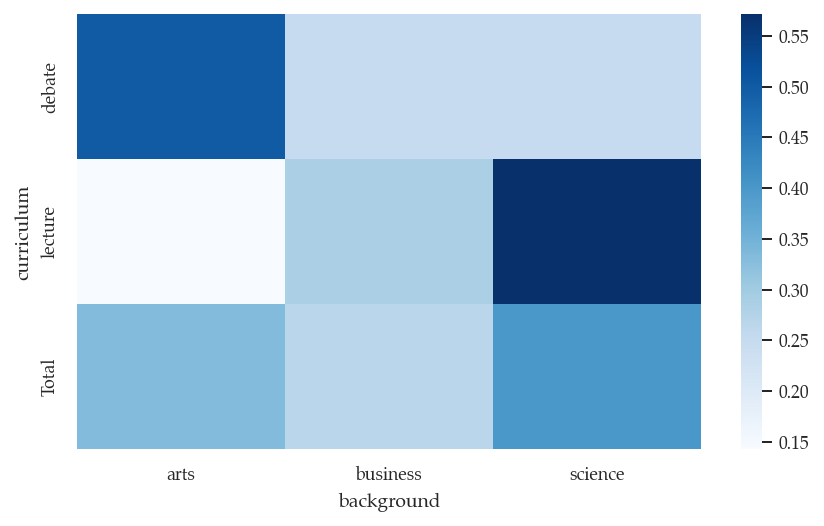

In [58]:
sns.heatmap(
    pd.crosstab(
        index=students['curriculum'],
        columns=students['background'],
        margins=True,
        normalize='index',
        margins_name="Total",
    ),
    cmap="Blues"
)

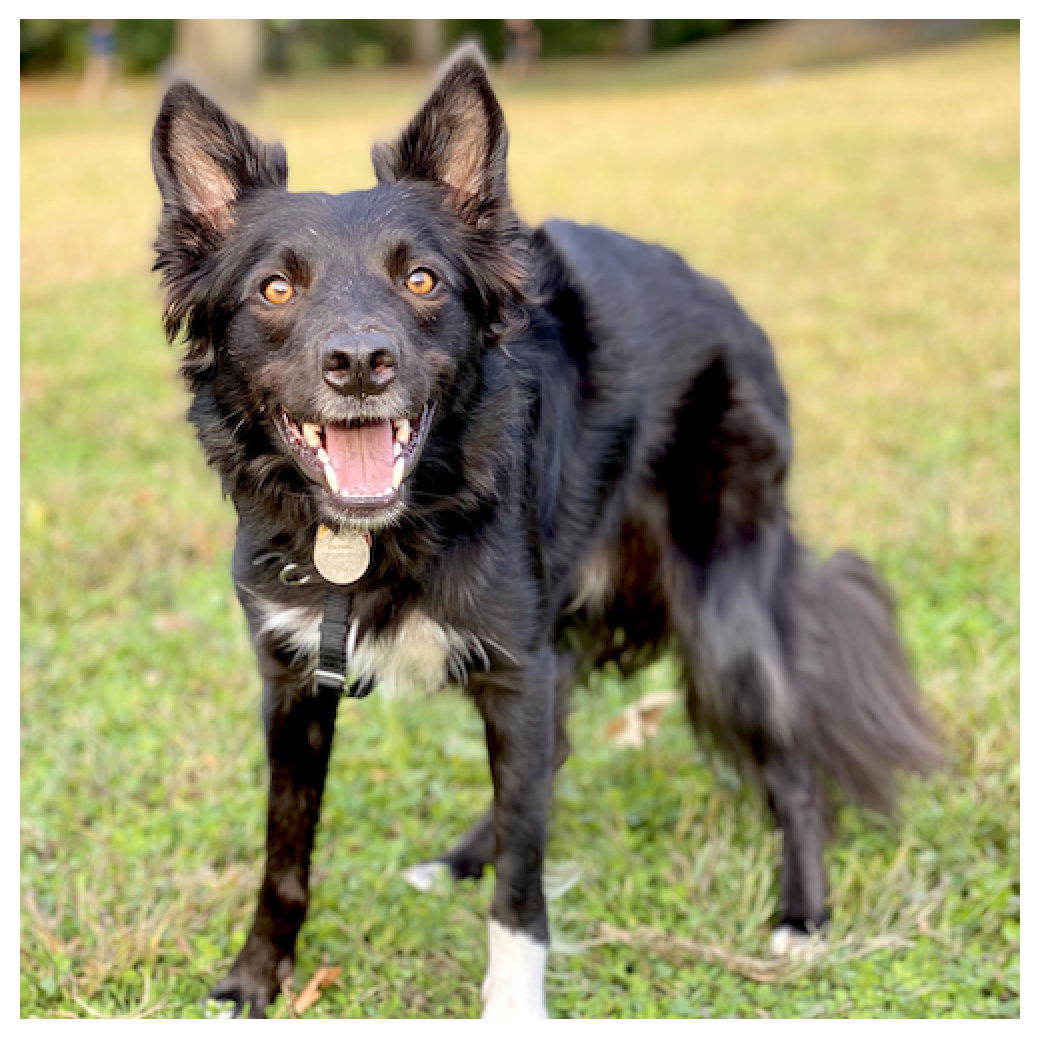

In [59]:
sns.dogplot()
